In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib
import pickle
import re
import requests
import tldextract
from urllib.parse import urlparse
from bs4 import BeautifulSoup

In [ ]:
!wget https://archive.ics.uci.edu/static/public/967/phiusiil+phishing+url+dataset.zip

--2025-02-02 09:02:52--  https://archive.ics.uci.edu/static/public/967/phiusiil+phishing+url+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘phiusiil+phishing+url+dataset.zip’

phiusiil+phishing+u     [   <=>              ]  14.66M  23.7MB/s    in 0.6s    

2025-02-02 09:02:53 (23.7 MB/s) - ‘phiusiil+phishing+url+dataset.zip’ saved [15376007]



In [ ]:
!unzip phiusiil+phishing+url+dataset.zip

Archive:  phiusiil+phishing+url+dataset.zip
  inflating: PhiUSIIL_Phishing_URL_Dataset.csv  


In [ ]:
dataset = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [ ]:
dataset.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
df = dataset.copy()
df.drop(columns=['FILENAME', 'URL', 'Domain', 'Title'], inplace=True)

In [ ]:
le = LabelEncoder()
df['TLD'] = le.fit_transform(df['TLD'])
joblib.dump(le, 'tld_encoder.pkl')

['tld_encoder.pkl']

In [ ]:
df.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,231,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,254,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,647,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,231,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,503,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
df['label'].value_counts(normalize=True)

,proportion
label,
1,0.571895
0,0.428105


In [ ]:
features_to_remove = [
    'NoOfObfuscatedChar',
    'HasObfuscation',
    'ObfuscationRatio',
    'IsDomainIP',
    'NoOfSelfRedirect',
    'NoOfLettersInURL',
    'URLTitleMatchScore',
    'HasPasswordField',
    'Crypto',
    'NoOfAmpersandInURL',
    'NoOfURLRedirect',
    'URLSimilarityIndex',
    'URLCharProb',
    'NoOfEqualsInURL',
    'NoOfQMarkInURL'
]

df_cleaned = df.drop(columns=features_to_remove)

<Axes: >

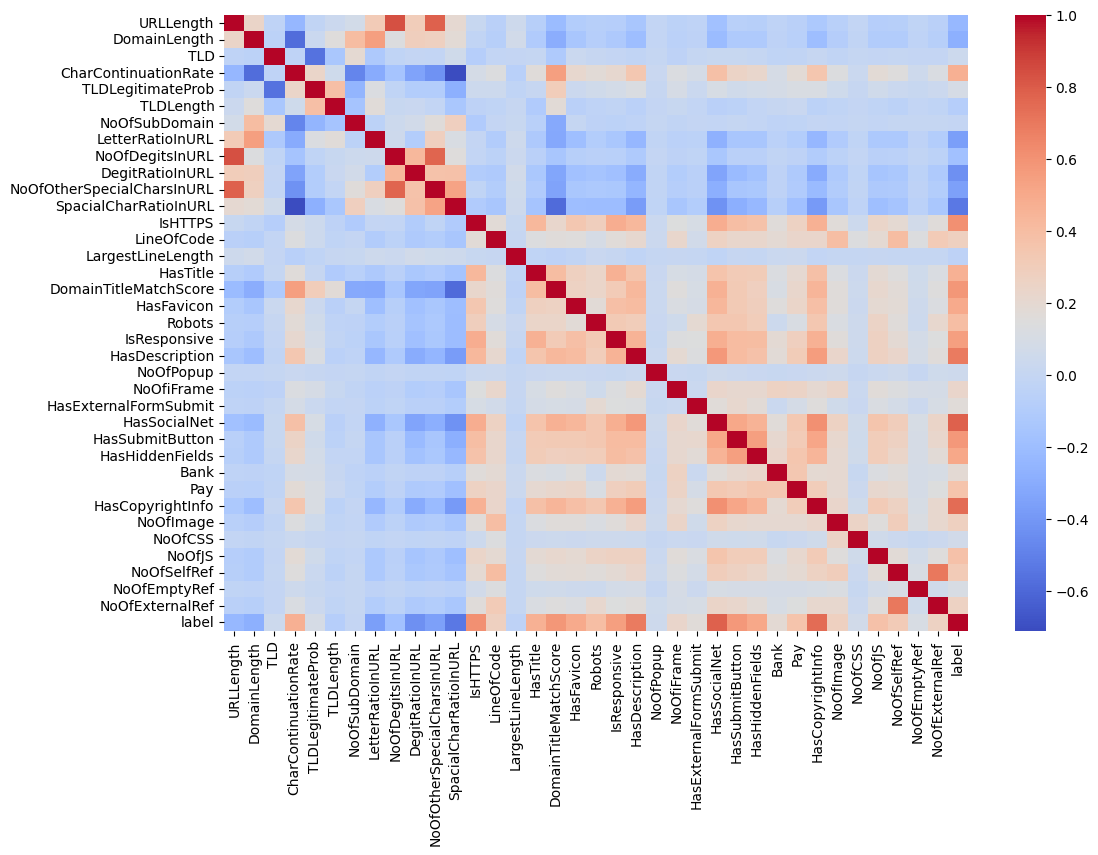

In [ ]:
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   TLD                         235795 non-null  int64  
 3   CharContinuationRate        235795 non-null  float64
 4   TLDLegitimateProb           235795 non-null  float64
 5   TLDLength                   235795 non-null  int64  
 6   NoOfSubDomain               235795 non-null  int64  
 7   LetterRatioInURL            235795 non-null  float64
 8   NoOfDegitsInURL             235795 non-null  int64  
 9   DegitRatioInURL             235795 non-null  float64
 10  NoOfOtherSpecialCharsInURL  235795 non-null  int64  
 11  SpacialCharRatioInURL       235795 non-null  float64
 12  IsHTTPS                     235795 non-null  int64  
 13  LineOfCode    

In [ ]:
X = df_cleaned.drop(columns=['label'])
original_column_names = X.columns
print(original_column_names)
y = df_cleaned['label']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')

X = pd.DataFrame(X, columns=original_column_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=12)

Index(['URLLength', 'DomainLength', 'TLD', 'CharContinuationRate',
       'TLDLegitimateProb', 'TLDLength', 'NoOfSubDomain', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'Bank', 'Pay', 'HasCopyrightInfo', 'NoOfImage',
       'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'],
      dtype='object')


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    return accuracy_score(y_true, y_pred)

In [ ]:
rf_model = RandomForestClassifier(max_depth=5, random_state = 0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = evaluate_model(y_test, rf_pred, "Random Forest")


Random Forest Results:
Accuracy: 0.9982894867046467

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30284
           1       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739


Confusion Matrix:
[[30209    75]
 [   46 40409]]


In [ ]:
rf_model_path = "rf_model.pkl"

with open(rf_model_path, 'wb') as f:
    pickle.dump(rf_model, f)
print(f"Model saved to {rf_model_path}")

Model saved to rf_model.pkl


In [ ]:
def get_legitimate_probability(domain):

    API_KEY = 'your_api_key'
    BASE_URL = 'https://www.virustotal.com/api/v3/domains/'

    url = f"{BASE_URL}{domain}/votes"
    headers = {'x-apikey': API_KEY}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json().get('data', [])

        harmless_count = sum(1 for vote in data if vote['attributes']['verdict'] == 'harmless')
        total_votes = len(data)

        legitimacy_prob = harmless_count / total_votes if total_votes > 0 else 0

        return legitimacy_prob
    else:
        return float(0)

def extract_url_features(url):
    features = {}

    features["URLLength"] = len(url)
    parsed_url = urlparse(url)
    extracted = tldextract.extract(url)

    features["DomainLength"] = len(parsed_url.netloc)
    features["TLD"] = extracted.suffix
    features["CharContinuationRate"] = sum(1 for i in range(len(url)-1) if url[i].isalpha() == url[i+1].isalpha()) / len(url)
    features["TLDLegitimateProb"] = get_legitimate_probability(parsed_url.netloc)
    features["TLDLength"] = len(extracted.suffix)
    features["NoOfSubDomain"] = len(extracted.subdomain.split('.')) if extracted.subdomain else 0

    features["LetterRatioInURL"] = sum(c.isalpha() for c in url) / len(url)
    features["NoOfDegitsInURL"] = sum(c.isdigit() for c in url)
    features["DegitRatioInURL"] = features["NoOfDegitsInURL"] / len(url)


    features["NoOfOtherSpecialCharsInURL"] = len(re.findall(r'[=?@#^&*<>~]', url))
    features["SpacialCharRatioInURL"] = features["NoOfOtherSpecialCharsInURL"] / len(url)
    features["IsHTTPS"] = 1 if parsed_url.scheme == "https" else 0

    try:
        response = requests.get(url, timeout=5)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')


        features["LineOfCode"] = html.count('\n')
        features["LargestLineLength"] = max(len(line) for line in html.split('\n'))
        features["HasTitle"] = 1 if soup.title else 0

        if soup.title:
            title_text = soup.title.text.lower()
            domain_name = extracted.domain.lower()

            matches = 0
            title_len = len(title_text)
            domain_len = len(domain_name)


            def longest_common_substring(s1, s2):
                m = [[0] * (1 + len(s2)) for _ in range(1 + len(s1))]
                longest = 0
                for x in range(1, 1 + len(s1)):
                    for y in range(1, 1 + len(s2)):
                        if s1[x-1] == s2[y-1]:
                            m[x][y] = m[x-1][y-1] + 1
                            longest = max(longest, m[x][y])
                return longest

            lcs_length = longest_common_substring(domain_name, title_text)

            substring_ratio = (lcs_length / domain_len)*100 if domain_len > 0 else 0
            exact_match = 100.0 if domain_name in title_text else 0


            features["DomainTitleMatchScore"] = substring_ratio
        else:
            features["DomainTitleMatchScore"] = 0

        features["HasFavicon"] = 1 if soup.find("link", rel="icon") else 0

        try:
            robots_response = requests.get(parsed_url.scheme + "://" + parsed_url.netloc + "/robots.txt", timeout=5)
            features["Robots"] = 1 if robots_response.status_code == 200 else 0
        except:
            features["Robots"] = 0

        features["IsResponsive"] = 1 if soup.find("meta", attrs={"name": "viewport"}) else 0
        features["HasDescription"] = 1 if soup.find("meta", attrs={"name": "description"}) else 0



        features["NoOfPopup"] = html.lower().count("window.open")
        features["NoOfiFrame"] = len(soup.find_all("iframe"))
        features["HasExternalFormSubmit"] = 1 if any(form.get("action") and extracted.domain not in form.get("action", "") for form in soup.find_all("form")) else 0

        social_patterns = {

            'links': [
                r'(?:www\.)?(?:facebook|fb)\.com',
                r'(?:www\.)?twitter\.com',
                r'(?:www\.)?linkedin\.com',
                r'(?:www\.)?instagram\.com',
                r'(?:www\.)?tiktok\.com',
                r'(?:www\.)?pinterest\.com',
                r'(?:www\.)?reddit\.com',
                r'(?:www\.)?youtube\.com',
                r't\.me',
                r'(?:www\.)?weibo\.com',
                r'(?:www\.)?vk\.com',
            ],


            'buttons': [
                'share-button',
                'social-share',
                'share-icon',
                'follow-button',
                'social-icon',
                'social-media',
            ],


            'elements': [
                'social',
                'share',
                'follow',
                'network',
                'connect',
            ],


            'meta': [
                'og:social',
                'twitter:card',
                'fb:app_id',
                'instagram:',
            ],


            'text': [
                'follow us',
                'share this',
                'connect with us',
                'find us on',
                'join us on',
            ]
        }


        has_social = False

        for pattern in social_patterns['links']:
            if re.search(pattern, html.lower()):
                has_social = True
                break

        if not has_social:
            for button in social_patterns['buttons']:
                if soup.find(attrs={'class': re.compile(button, re.I)}) or \
                   soup.find(attrs={'id': re.compile(button, re.I)}):
                    has_social = True
                    break

        if not has_social:
            for element in social_patterns['elements']:
                if soup.find(attrs={'class': re.compile(f'.*{element}.*', re.I)}) or \
                   soup.find(attrs={'id': re.compile(f'.*{element}.*', re.I)}):
                    has_social = True
                    break

        if not has_social:
            for meta in social_patterns['meta']:
                if soup.find('meta', attrs={'property': re.compile(meta, re.I)}) or \
                   soup.find('meta', attrs={'name': re.compile(meta, re.I)}):
                    has_social = True
                    break

        if not has_social:
            for text in social_patterns['text']:
                if re.search(text, html.lower()):
                    has_social = True
                    break

        features["HasSocialNet"] = 1 if has_social else 0
        features["HasSubmitButton"] = 1 if soup.find("input", {"type": "submit"}) else 0
        features["HasHiddenFields"] = 1 if soup.find("input", {"type": "hidden"}) else 0

        features["Bank"] = 1 if any(keyword in html.lower() for keyword in ["bank", "secure", "login"]) else 0
        features["Pay"] = 1 if any(keyword in html.lower() for keyword in ["pay", "payment", "checkout"]) else 0

        features["HasCopyrightInfo"] = 1 if "©" in html or "copyright" in html.lower() else 0


        features["NoOfImage"] = len(soup.find_all("img"))
        features["NoOfCSS"] = len(soup.find_all("link", rel="stylesheet"))
        features["NoOfJS"] = len(soup.find_all("script"))


        all_links = [a.get("href") for a in soup.find_all("a") if a.get("href")]
        features["NoOfSelfRef"] = sum(1 for link in all_links if extracted.domain in link)
        features["NoOfEmptyRef"] = sum(1 for link in all_links if link in ["", "#"])
        features["NoOfExternalRef"] = sum(1 for link in all_links if extracted.domain not in link and link.startswith("http"))



    except requests.RequestException:
        for key in ["LineOfCode", "LargestLineLength", "HasTitle", "DomainTitleMatchScore", "HasFavicon","Robots", "IsResponsive", "HasDescription", "NoOfPopup", "NoOfiFrame", "HasExternalFormSubmit", "HasSocialNet", "HasSubmitButton", "HasHiddenFields", "Bank", "Pay", "HasCopyrightInfo", "NoOfImage", "NoOfCSS", "NoOfJS", "NoOfSelfRef", "NoOfEmptyRef", "NoOfExternalRef"]:
            features[key] = 0

    return features



In [ ]:
url = "https://rnenou.com"
features = extract_url_features(url)
df_test = pd.DataFrame([features])

In [ ]:
le = joblib.load('tld_encoder.pkl')
df_test['TLD'] = df_test['TLD'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   URLLength                   1 non-null      int64  
 1   DomainLength                1 non-null      int64  
 2   TLD                         1 non-null      int64  
 3   CharContinuationRate        1 non-null      float64
 4   TLDLegitimateProb           1 non-null      int64  
 5   TLDLength                   1 non-null      int64  
 6   NoOfSubDomain               1 non-null      int64  
 7   LetterRatioInURL            1 non-null      float64
 8   NoOfDegitsInURL             1 non-null      int64  
 9   DegitRatioInURL             1 non-null      float64
 10  NoOfOtherSpecialCharsInURL  1 non-null      int64  
 11  SpacialCharRatioInURL       1 non-null      float64
 12  IsHTTPS                     1 non-null      int64  
 13  LineOfCode                  1 non-null 

In [ ]:
df_test.head()

,URLLength,DomainLength,TLD,CharContinuationRate,TLDLegitimateProb,TLDLength,NoOfSubDomain,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,...,HasHiddenFields,Bank,Pay,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,18,10,231,0.722222,0,3,0,0.777778,0,0.0,...,1,0,0,0,0,1,3,0,0,2


In [ ]:
df_test['DomainTitleMatchScore']

,DomainTitleMatchScore
0,33.333333


In [ ]:
scaler = joblib.load('scaler.pkl')
df_test = scaler.transform(df_test)
df_test = pd.DataFrame(df_test, columns=original_column_names)

In [ ]:
df_test.head()

,URLLength,DomainLength,TLD,CharContinuationRate,TLDLegitimateProb,TLDLength,NoOfSubDomain,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,...,HasHiddenFields,Bank,Pay,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,0.000822,0.056604,0.332853,0.722222,0.0,0.090909,0.0,0.839933,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.000028,0.000431,0.0,0.0,0.000073


In [ ]:
with open("rf_model.pkl", 'rb') as f:
      rf_model_infer = pickle.load(f)

In [ ]:
rf_prob = rf_model_infer.predict_proba(df_test)[0]

In [ ]:
if rf_prob[0] > 0.60:
  print("It is phishing website")
else:
  print("It is not phishing website")

It is phishing website


In [ ]:
rf_prob

array([0.9170844, 0.0829156])